<a href="https://colab.research.google.com/github/enio-martinelli/Faculdade/blob/main/Agrupamento_de_dados_pelo_m%C3%A9todo_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ALUNO:** Enio Martinelli **RA:** 790891

O conjunto de dados escolhido foi [Wine Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/), disponível no repositório UCI e no pacote `sklearn.datasets`. Esse conjunto possui o atributo classe, que foi removido.

In [9]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['class'] = wine.target
X = df.drop('class', axis=1)  #Novo conjunto de dados sem o atributo classe


Normalização dos atributos contínuos, no caso do Wine Data Set, todos seus atributos são contínuos, portanto todos serão normalizados.

In [10]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)


Aplicação do algoritmo k-means no conjunto de dados (sem a classe), usando a classe `KMeans` e a função `fit()` (módulo `sklearn.cluster`). O número de grupos foi definido num intervalo de 3 a 20, e o algoritmo é aplicado para cada valor do intervalo.

Armazenamento do valor do índice soma quadrática das distâncias para todos os agrupamentos encontrados usando o atributo `inertia_` da classe `KMeans`

In [23]:
from sklearn.cluster import KMeans

SomaQuadradoDistancia = [] #lista que vai armazenar o valor do índice soma quadrática das distâncias para todos os agrupamentos encontrados
K = range(1,10)
for k in K: #aplicação do algoritmo KMeans para todos os valores de grupos
  km = KMeans(n_clusters=k) 
  km = km.fit(data_transformed)
  SomaQuadradoDistancia.append(km.inertia_)


Gráfico dos índices encontrados para cada número de grupos

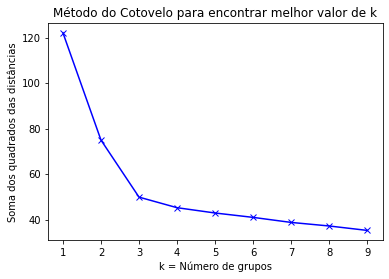

In [25]:
import matplotlib.pyplot as plt

plt.plot(K, SomaQuadradoDistancia, 'bx-')
plt.xlabel('k = Número de grupos')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo para encontrar melhor valor de k')
plt.show()

Pelo método do cotovelo, o melhor número de grupos seria entre 3 ou 4, cabendo a um especialista avaliar os resultados de cada caso, na etapa de interpretação, e decidir qual quantidade é melhor.